In [15]:
from empatica_processing import Empatica
from siot_ml_processing import SiotML
import matplotlib.pyplot as plt
import numpy as np
import warnings

# YOLO
warnings.filterwarnings("ignore")

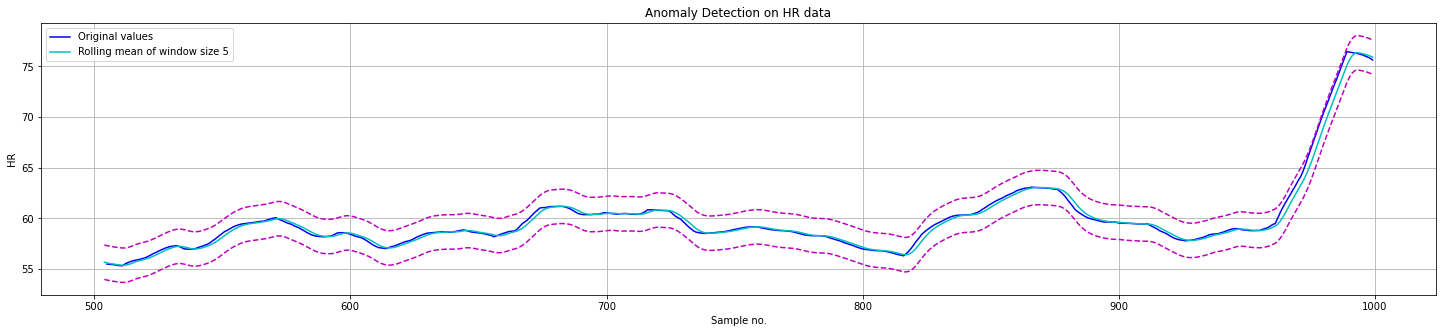

In [23]:
# instantiate an instance of the class for processing empatica time series data
emp = Empatica()
# plot moving average and look for anomalies
emp.moving_average('HR', emp.data['session_2']['HR.csv']['HR'][500:1000], 5, find_anomalies=True)
# fix any anomalies found in the data
emp.fix_all_anomalies()

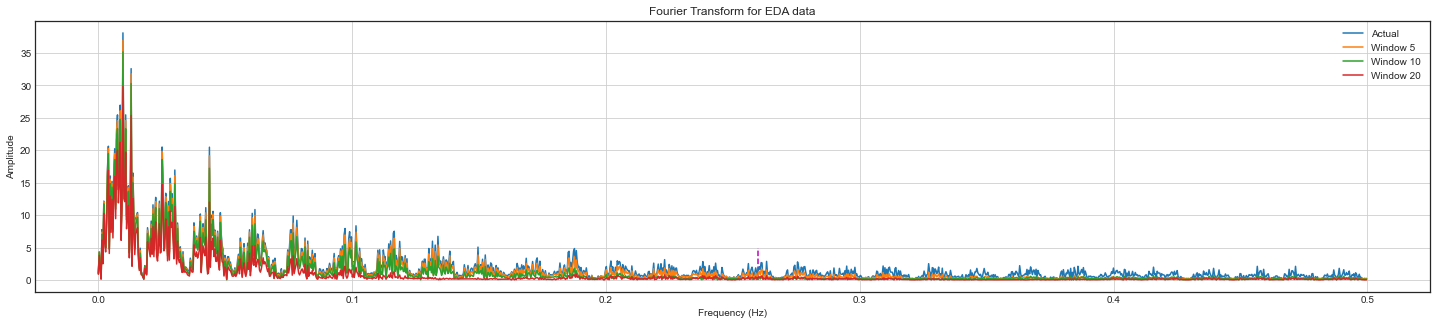

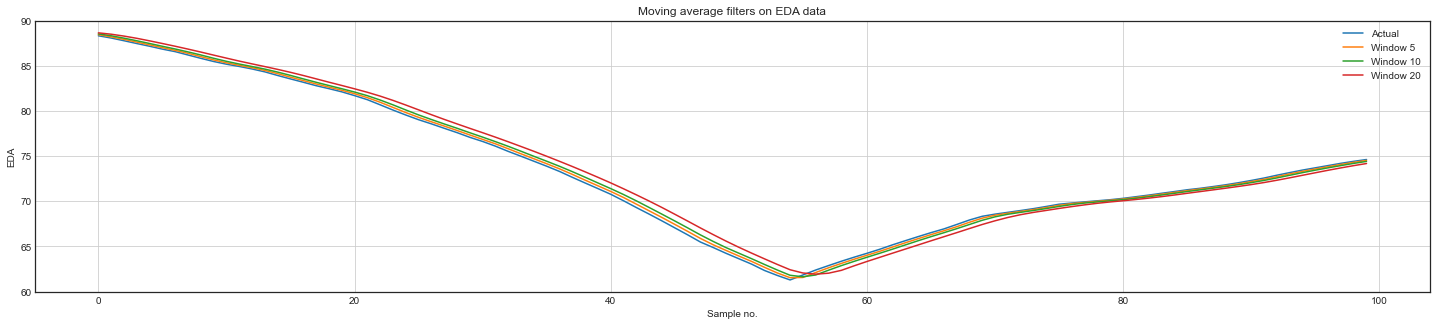

In [25]:
# use a fourier transform to see the effect different window sizes has on the smoothing
dataset = emp.data['session_1']['HR.csv']['HR']
data_dict = {'Actual':dataset[20:],
             'Window 5':dataset.rolling(window=2).mean()[20:],
             'Window 10':dataset.rolling(window=3).mean()[20:],
             'Window 20': dataset.rolling(window=5).mean()[20:]}
emp.plot_fourier_transform(data_dict, 'EDA', 1)
# smooth the data using a moving average with the set window sizes  inside the class
emp.smooth_data()

In [26]:
# instantiate an instance for the class that deals with the spotify song processing
siot = SiotML()
# create the different baselines for data standardisation using a window of 4 seconds leading up to the song starting
emp.baseline(4, siot.timestamp_data)
# standardise the data against the differnt baseline to try and minus out any effect that is not caused by the song
emp.relative_baseline(siot.timestamp_data)
# extract the standardised empatica data dictionary
cleaned_empatica_data = emp.get_standardised_dict()

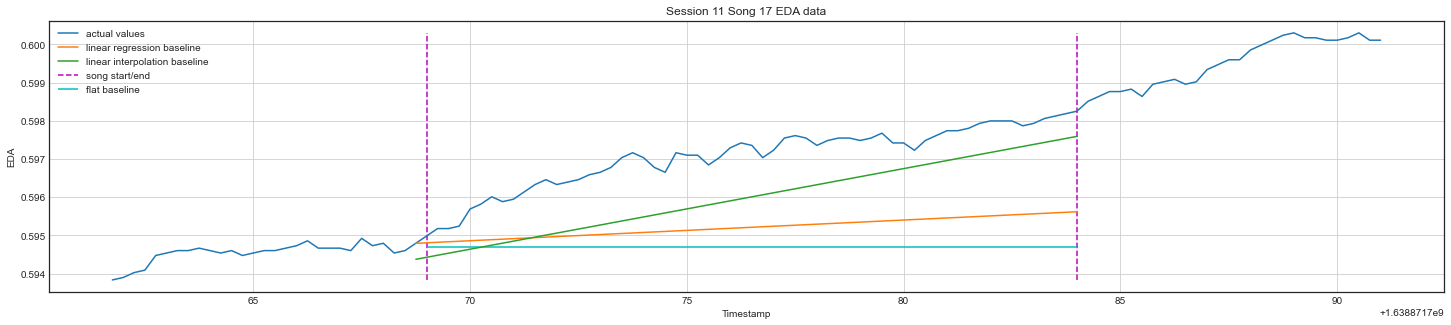

In [27]:
emp.plot_song_data(siot.timestamp_data, 11, 17, 'EDA', 7, plot_flatbaseline=True, plot_linreg=True, plot_lininterp=True)

In [28]:
# load the cleaned empatica data into the spotify song dataframe
siot.load_empatica_data(cleaned_empatica_data)
# join the dataframes from each listening session into one dataframe
siot.build_full_df()
# for discrete fields, create binary columns in the dataframe
siot.binarize_discrete_fields()
# move the timestamp information into the dataframe index
siot.timestamp_index()
# get rid of unnecessary information in the dictionary
siot.drop_nontraining_info()
# split the dataframe into training, validation and test sets
siot.make_training_test_sets()
# standardise all the continuous fields in the dataframe
siot.standardize_continuous()

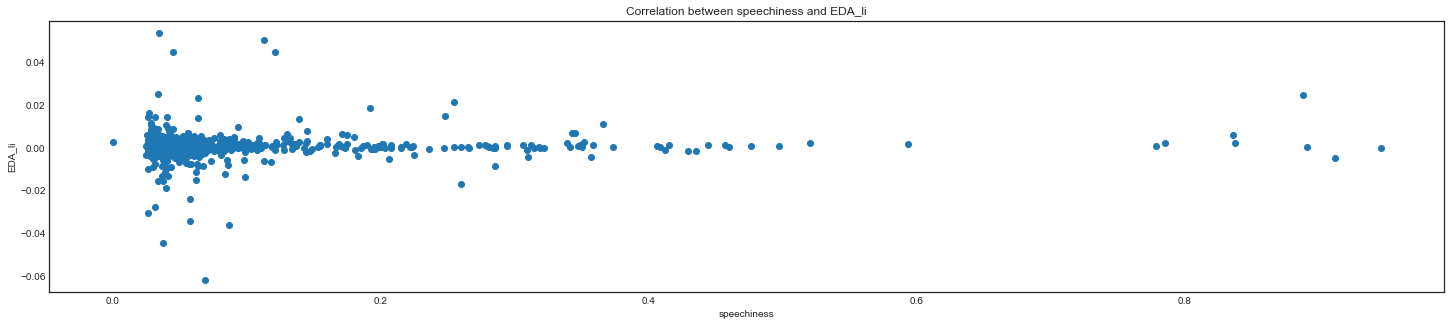

HR_lr  linear regression score:  -0.0089058241122848


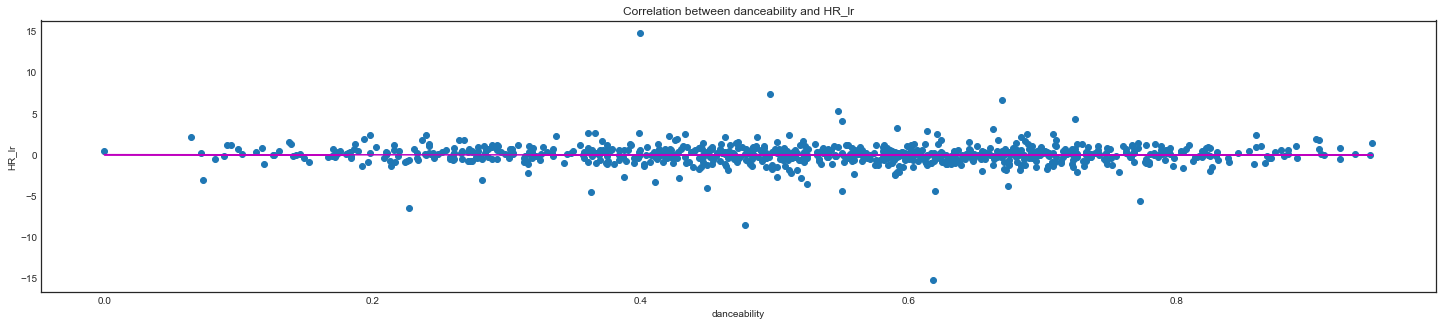

-0.0089058241122848

In [29]:
siot.plot_correlation('speechiness', 'EDA_li')
siot.linear_regression('HR_lr', ['danceability'], plot=True)

In [30]:
# do all the linear regression for the different biological datatypes, standardised with different baselines
correlation_test_list = ['EDA_li', 'EDA_lr', 'HR_li', 'HR_lr', 'TEMP_li', 'TEMP_lr']
siot.do_all_lin_reg(correlation_test_list)

EDA_li  linear regression score:  0.020877267044357883
EDA_lr  linear regression score:  -0.03566641695099304
HR_li  linear regression score:  -0.03853236570408125
HR_lr  linear regression score:  -0.030815331009230063
TEMP_li  linear regression score:  -0.0031075643471898395
TEMP_lr  linear regression score:  -0.1306878622577683
 
 ---- ¯\_(ツ)_/¯ ---- ¯\_(ツ)_/¯ ---- ¯\_(ツ)_/¯ ----
BEST LINEAR REGRESSION CORRELATION:  EDA_li
BEST LINEAR REGRESSION SCORE:  0.020877267044357883
 ---- ¯\_(ツ)_/¯ ---- ¯\_(ツ)_/¯ ---- ¯\_(ツ)_/¯ ----
 


In [31]:
siot.do_all_svr(correlation_test_list)

EDA_li best svr score: -1.6775629637250344, C: 0.95, epsilon: 0.55
EDA_lr best svr score: -6.927341795865978, C: 0.95, epsilon: 0.05
HR_li best svr score: -0.00640919795989614, C: 0.05, epsilon: 0.6
HR_lr best svr score: 0.01909152051020413, C: 0.2, epsilon: 0.45
TEMP_li best svr score: -0.39626465956998436, C: 0.05, epsilon: 0.05
TEMP_lr best svr score: -0.09053268694133942, C: 0.95, epsilon: 0.45
 
 ---- (ﾉ◕ヮ◕)ﾉ*:･ﾟ ---- (ﾉ◕ヮ◕)ﾉ*:･ﾟ ---- (ﾉ◕ヮ◕)ﾉ*:･ﾟ ----
BEST SUPPORT VECTOR REGRESSION CORRELATION:  HR_lr
CHOSEN C: 0.2 ---- CHOSEN EPSILON: 0.45 
BEST SUPPORT VECTOR REGRESSION SCORE:  0.007057138914464245
 ---- (ﾉ◕ヮ◕)ﾉ*:･ﾟ ---- (ﾉ◕ヮ◕)ﾉ*:･ﾟ ---- (ﾉ◕ヮ◕)ﾉ*:･ﾟ ----
 


In [32]:
siot.do_all_log_reg(correlation_test_list)

EDA_li best logreg score: 0.6626506024096386, C: 0.01
EDA_lr best logreg score: 0.7590361445783133, C: 0.01
HR_li best logreg score: 0.5783132530120482, C: 0.11
HR_lr best logreg score: 0.6144578313253012, C: 0.01
TEMP_li best logreg score: 0.6626506024096386, C: 0.16
TEMP_lr best logreg score: 0.6144578313253012, C: 0.01
 
 ---- (╯°□°）╯︵ ┻━┻  ---- (╯°□°）╯︵ ┻━┻ ---- (╯°□°）╯︵ ┻━┻
BEST LOGISTIC REGRESSION CLASSIFICATION:  TEMP_li
CHOSEN C: 0.16
BEST LOGISTIC REGRESSION SCORE:  0.6867469879518072
 ---- (╯°□°）╯︵ ┻━┻  ---- (╯°□°）╯︵ ┻━┻ ---- (╯°□°）╯︵ ┻━┻
 
